## The goal of collecting this dataset:
The goal of collecting the Student Stress Factors dataset is to conduct a comprehensive analysis of the factors contributing to student stress, with a focus on classifying students into different stress levels and clustering them based on common stress-related characteristics. By examining variables such as academic workload, personal life, social pressures, and mental health, this dataset aims to identify patterns and relationships that can classify students’ stress levels. Additionally, clustering techniques will be used to group students with similar stress profiles, which can provide insights for developing targeted strategies to reduce stress, improve well-being, and enhance academic performance.

## The source of the dataset:
https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis

In [645]:
import pandas as pd
df = pd.read_csv('Dataset/StressLevelDataset(in).csv')

## General information about the dataset:
Number of attributes: 21
Number of objects: 1100
Attribute types: All columns are integer types (int64)
## General information about the dataset:
Number of attributes: 21

Number of objects: 1100

Attribute types: All columns are integer types (int64)

Class label: stress_level

In [646]:
num_objects = len(df)
attributes_info = pd.DataFrame({
    'Attribute Name': df.columns,
    'Data Type': df.dtypes.values
})
print("Number of attributes:" ,len(df.columns))
print()
print("Attributes and their types:")
print(attributes_info)
print()
print("Number of objects: ",num_objects)

Number of attributes: 21

Attributes and their types:
                  Attribute Name Data Type
0                  anxiety_level     int64
1                    self_esteem     int64
2          mental_health_history     int64
3                     depression     int64
4                       headache     int64
5                 blood_pressure     int64
6                  sleep_quality     int64
7              breathing_problem     int64
8                    noise_level   float64
9              living_conditions   float64
10                        safety     int64
11                   basic_needs     int64
12          academic_performance     int64
13                    study_load   float64
14  teacher_student_relationship     int64
15        future_career_concerns     int64
16                social_support     int64
17                 peer_pressure     int64
18    extracurricular_activities     int64
19                      bullying     int64
20                  stress_level     int64


#### Check the Current Distribution of the Class Label:


In [647]:
# Check the current distribution of the class label

# Use value_counts to get the count of each unique value in the 'stress_level' column
# Set normalize=True to get the relative frequencies as percentages, multiplied by 100
class_distribution = df['stress_level'].value_counts(normalize=True) * 100
print("Class label distribution in the full dataset:") # Print a message to describe the output
print(class_distribution) # Display the distribution of the class labels in percentages

Class label distribution in the full dataset:
stress_level
0    33.909091
2    33.545455
1    32.545455
Name: proportion, dtype: float64


### Graphs:


#### Bar char (Stress Level):

stress_level
0    33.909091
2    33.545455
1    32.545455
Name: proportion, dtype: float64


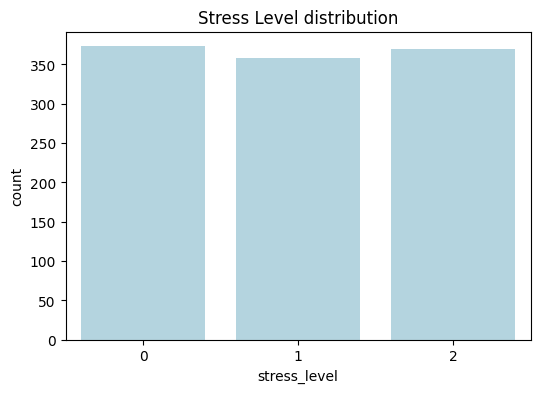

In [648]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the class distribution (counts of each class label)
print(class_distribution)
plt.figure(figsize=(6, 4)) # Set up the figure size for the plot
sns.countplot(x='stress_level', data=df, color='lightblue') # Use Seaborn's countplot to plot the distribution of the 'stress_level' column
plt.title('Stress Level distribution') # Set the title of the plot
plt.show() # Display the plot

This bar chart indicates that the dataset has an equal distribution of data across all stress levels, where 0 represents low stress, 1 stands for medium stress, and 2 indicates high stress. This balance is crucial for ensuring the integrity of analysis and predictions, as it prevents class imbalance that can distort results or cause predictive models to become biased. In an imbalanced dataset, models may disproportionately favor the majority class (e.g., "low stress"), leading to inaccurate and unfair predictions for underrepresented categories (e.g., "high stress"). The balanced representation in this dataset ensures more reliable and fair predictions, allowing for better understanding and intervention across all stress levels, thereby promoting effective strategies for managing student stress.

#### Pie chart (Social Support):

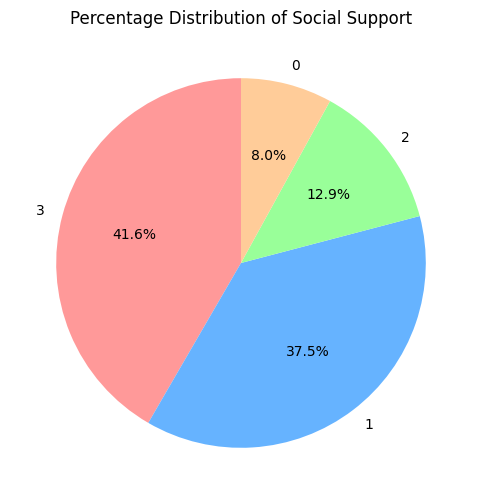

In [649]:
data2 = df['social_support'].value_counts(normalize=True) * 100 # Calculate the percentage distribution of the 'social_support' column
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'] 
data2.plot.pie(autopct='%1.1f%%', figsize=(6, 6), startangle=90, colors=custom_colors) # Plot the percentage distribution as a pie chart
plt.title('Percentage Distribution of Social Support') # Set the title of the pie chart
plt.ylabel('') # Remove the y-axis label for a cleaner pie chart presentation
plt.show() # Display the pie chart

The pie chart reveals that the majority of students (over 70%) experience either low or high levels of social support, with the largest percentage (41.6%) feeling well-supported. This suggests that many students have access to strong social networks, which can play a critical role in their academic success and mental health. However, around 8% of students report having no support, which is concerning. A lack of social support can significantly impact a student’s ability to manage stress, maintain motivation, and succeed academically. Addressing this issue through targeted interventions, such as peer mentoring, counseling services, or group activities, could help those with little to no support build stronger connections and improve their overall well-being. Understanding these different levels of social support is key to developing strategies that support students’ academic performance and mental health.

#### Box plot (Bullying):

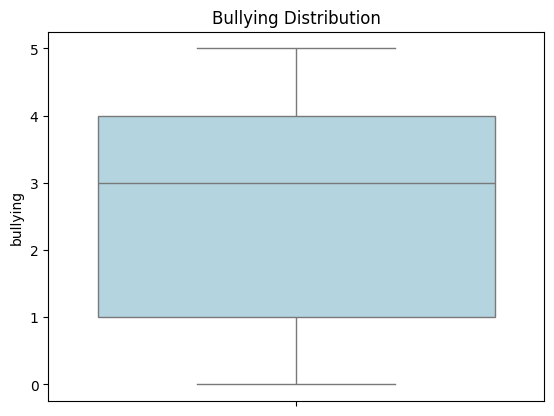

In [650]:
# Create a box plot for the 'bullying' column in the dataset
sns.boxplot(data=df['bullying'], color='lightblue')
plt.title('Bullying Distribution') # Set the title for the plot
plt.show() # Display the plot

The box plot shows the distribution of the "bullying" variable, with the interquartile range (IQR) captured by the box, and the 25th and 75th percentiles at the edges. The median bullying level is around 3, as indicated by the line inside the box. The whiskers extend to the minimum and maximum values, showing that most data points lie between 1 and 5, with no significant outliers. This distribution suggests that bullying incidents are relatively common in the population, with most students experiencing moderate levels of bullying. The lack of outliers indicates that extreme cases are rare, and interventions may need to focus on addressing the more typical experiences of bullying rather than isolated severe incidents. Understanding this spread is crucial for tailoring prevention and support programs.

#### Histogram (Stress level, Academic performance)

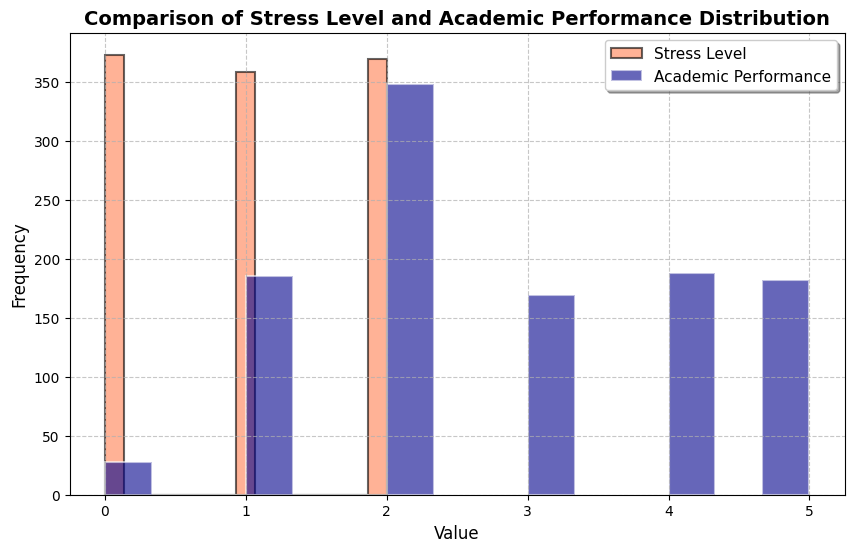

In [651]:
plt.figure(figsize=(10, 6)) # Set the figure size for the histogram
plt.hist(df['stress_level'], 
         bins=15,                 # Number of bins for the histogram
         color='coral',          # Color for the Stress Level histogram
         edgecolor='black',      # Color of the bin edges
         alpha=0.6,              # Transparency level of the histogram
         label='Stress Level',    # Label for the legend
         histtype='stepfilled',   # Style of the histogram
         linewidth=1.5)          # Width of the bin edges

plt.hist(df['academic_performance'], 
         bins=15,                 # Number of bins for the histogram
         color='darkblue',       # Color for the Academic Performance histogram
         edgecolor='white',      # Color of the bin edges
         alpha=0.6,              # Transparency level of the histogram
         label='Academic Performance', # Label for the legend
         histtype='stepfilled',   # Style of the histogram
         linewidth=1.5)          # Width of the bin edges

plt.title('Comparison of Stress Level and Academic Performance Distribution', fontsize=14, fontweight='bold')  # Title of the plot
plt.xlabel('Value', fontsize=12)        # X-axis label
plt.ylabel('Frequency', fontsize=12)    # Y-axis label
plt.grid(True, linestyle='--', alpha=0.7)  # Style of the gridlines
plt.legend(frameon=True, fancybox=True, shadow=True, loc='upper right', fontsize=11)  # Legend properties

# Display the histogram
plt.show()


Based on the histogram illustrating the relationship between stress level and academic performance, it is clear that students with higher academic achievement tend to exhibit elevated stress levels. This trend indicates that as students strive for better grades and higher academic standing, they often encounter increased pressure and demands associated with their studies. 

#### Scater plot(Anxiety Level, Self esteem)

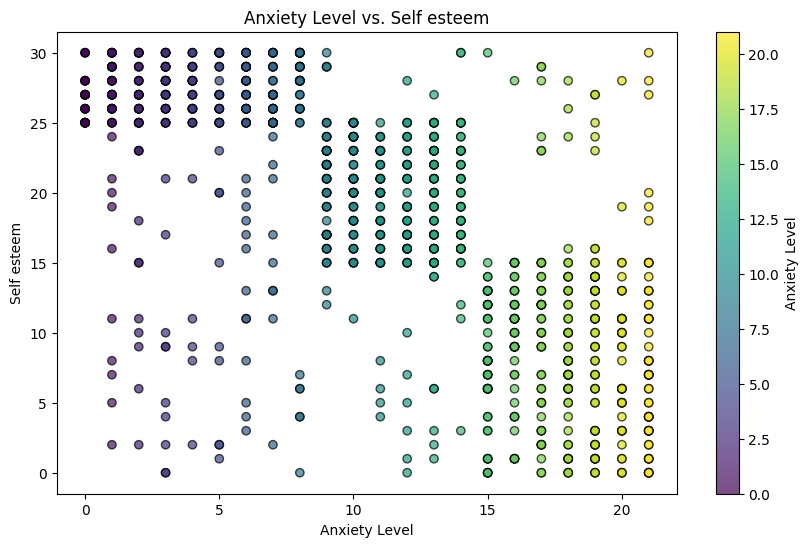

In [652]:
plt.figure(figsize=(10, 6))  # Set the figure size for the scatter plot

# Normalize the anxiety level for color mapping
norm = plt.Normalize(df['anxiety_level'].min(), df['anxiety_level'].max())

# Create a scatter plot with colors based on anxiety levels
scatter = plt.scatter(df['anxiety_level'], df['self_esteem'], 
                      c=df['anxiety_level'],  # Color based on anxiety levels
                      cmap='viridis',         # Colormap to use
                      norm=norm,              # Normalize values for colormap
                      alpha=0.7,             # Set transparency of points
                      edgecolor='black')      # Outline color for points

plt.title('Anxiety Level vs. Self esteem')  # Set the title for the scatter plot to describe the data being represented
plt.xlabel('Anxiety Level')  # Label the x-axis to indicate that it represents anxiety levels
plt.ylabel('Self esteem')  # Label the y-axis to indicate that it represents depression levels
cbar = plt.colorbar(scatter) # Add a colorbar to indicate the mapping of colors to anxiety levels
cbar.set_label('Anxiety Level')  # Label for the color bar

plt.show() 



This plot illustrates a negative relationship between anxiety level and self-esteem, suggesting that as anxiety levels increase, self-esteem tends to decrease. This finding aligns with expectations in psychological studies, where heightened anxiety is often associated with lower self-worth and confidence. The observed pattern indicates a potential link between these variables in your data, highlighting the importance of addressing anxiety to promote healthier self-esteem levels. Further analysis on the correlation between anxiety and self-esteem, as well as the potential causation, may be warranted to understand the dynamics of these relationships better and to develop effective interventions.

### Statistical summaries:

In [653]:
summary_stats=df.describe()
print(summary_stats)

       anxiety_level  self_esteem  mental_health_history   depression  \
count    1100.000000  1100.000000            1100.000000  1100.000000   
mean       11.063636    17.777273               0.492727    12.555455   
std         6.117558     8.944599               0.500175     7.727008   
min         0.000000     0.000000               0.000000     0.000000   
25%         6.000000    11.000000               0.000000     6.000000   
50%        11.000000    19.000000               0.000000    12.000000   
75%        16.000000    26.000000               1.000000    19.000000   
max        21.000000    30.000000               1.000000    27.000000   

          headache  blood_pressure  sleep_quality  breathing_problem  \
count  1100.000000     1100.000000    1100.000000        1100.000000   
mean      2.508182        2.181818       2.660000           2.753636   
std       1.409356        0.833575       1.548383           1.400713   
min       0.000000        1.000000       0.000000     

### By using the df.describe() function, we obtain these results.

#### Anxiety Levels
The dataset includes 1,100 entries on anxiety levels, revealing an average score of approximately 11.06, with a standard deviation of 6.12. Anxiety levels range from a minimum of 0 to a maximum of 21, with most individuals scoring between 6 and 16.

#### Self-Esteem
In terms of self-esteem, there are also 1,100 entries. The average self-esteem score is about 17.78, with a standard deviation of 8.94. Scores range from 0 to 30, predominantly falling between 11 and 26.

#### Mental Health History
Regarding mental health history, roughly 49.27% of the individuals in the dataset reported having a history of mental health issues, while 50.73% did not.

#### Depression Levels
The dataset includes 1,100 instances related to depression levels, with an average score of approximately 12.56 and a standard deviation of 7.73. Scores range from 0 to 27, with most values falling between 6 and 19.

#### Headache Reports
There are 1,100 records of reported headache levels, showing an average score of about 2.51, with a standard deviation of 1.41. The headache scores range from 0 to 5, with the majority of responses clustering between 1 and 3.

#### Blood Pressure Levels
The dataset contains 1,100 blood pressure readings, with an average score of approximately 2.18 and a standard deviation of 0.83. The scores range from 1 to 3, with most individuals scoring either 1 or 2.

#### Sleep Quality
For sleep quality, the dataset shows 1,100 instances, with an average score of about 2.66 and a standard deviation of 1.55. Sleep quality scores range from 0 to 5, and most individuals scored between 1 and 4.

#### Breathing Problems
The dataset includes 1,100 reports on breathing problems, revealing an average score of approximately 2.75 and a standard deviation of 1.40. Scores range from 0 to 5, with most individuals reporting scores between 2 and 4.

#### Noise Levels
Regarding noise levels, there are 1,100 entries in the dataset, with an average score of about 2.65 and a standard deviation of 1.33. The noise level scores range from 0 to 5, with the majority falling between 2 and 3.

#### Living Conditions
The dataset contains 1,100 instances of living conditions, showing an average score of approximately 2.52 with a standard deviation of 1.12. Scores range from 0 to 5, with most individuals reporting either a score of 2 or 3.

#### Safety Levels
There are 1,100 records of safety levels, with an average score of about 2.78 and a standard deviation of 1.51. The scores range from 0 to 5, with most responses clustered between 2 and 4.

#### Basic Needs Satisfaction
Finally, the dataset includes 1,100 instances regarding satisfaction with basic needs, revealing an average score of approximately 2.77 and a standard deviation of 1.43. Scores range from 0 to 5, with most individuals scoring between 2 and 4.

## Data Preprocessing:

### Handling Duplicates

Duplicate rows in a dataset can introduce redundancy, skewing the analysis and leading to inaccurate results. In this step, we checked for and removed any duplicate rows using the duplicated() function. This ensures that each data point is unique, preserving the quality and integrity of the dataset.

In [654]:
# Handling Duplicates
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

# Remove duplicates and save the cleaned dataset
df = df.drop_duplicates()

# Save after handling duplicates
df.to_csv('Cleaned_Dataset.csv', index=False)

Number of duplicate rows: 0


#### Result:

Upon checking the dataset, the result showed 0 duplicate rows, meaning that no redundant data points were found. The dataset is clean, and no further action regarding duplicates was necessary

### Missing values:

In [655]:
# Check for missing values
missing_values = df.isnull().sum() # This creates a Series containing the count of missing values per column
print("Missing values per column:") # Print a message indicating that missing values will be displayed
print(missing_values) # Print missing values per column

Missing values per column:
anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


Result:

The results show that there are **no missing values** in any of the columns in the dataset. This indicates that the dataset is fully populated and no imputation or removal of rows/columns due to missing data is required, making it well-suited for further analysis or modeling without needing to handle missing values.

### Handling Outliers:

Outliers are extreme values that can impact the accuracy of data analysis. To address this, we used the Interquartile Range (IQR) method, which identifies outliers by looking for values significantly above or below the normal range in numeric columns. Instead of removing these outliers, we cap their values to minimize their influence while preserving the overall dataset structure.

In [656]:
data = pd.read_csv('Cleaned_Dataset.csv')
import numpy as np

# Outlier handling using IQR method
outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

# Select numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Detect outliers in each numeric column
outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

# Print outlier summary
print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts:
anxiety_level: 0 rows with outliers
self_esteem: 0 rows with outliers
mental_health_history: 0 rows with outliers
depression: 0 rows with outliers
headache: 0 rows with outliers
blood_pressure: 0 rows with outliers
sleep_quality: 0 rows with outliers
breathing_problem: 0 rows with outliers
noise_level: 0 rows with outliers
living_conditions: 0 rows with outliers
safety: 0 rows with outliers
basic_needs: 0 rows with outliers
academic_performance: 0 rows with outliers
study_load: 0 rows with outliers
teacher_student_relationship: 0 rows with outliers
future_career_concerns: 0 rows with outliers
social_support: 0 rows with outliers
peer_pressure: 0 rows with outliers
extracurricular_activities: 0 rows with outliers
bullying: 0 rows with outliers
stress_level: 0 rows with outliers
Total Rows with Outliers: 0


Result:

After applying the IQR method, no outliers were detected in any of the columns, as shown by the result where each column has 0 rows with outliers. This means that the dataset is clean, and no extreme values exist that could distort further analysis or modeling.

## Data Transformation


Encoding was not used because it is only necessary for categorical or textual data. Since the dataset contained numerical data, there was no need for encoding.


### Normalization
In the transformation process, Normalization was applied because the data consisted of numerical values that needed to be scaled to a specific range (typically 0 to 1). This ensures that features with different scales do not disproportionately influence machine learning models.

In [657]:
data = pd.DataFrame(data)
# Columns to normalize
columns_to_normalize = [
    'anxiety_level', 'self_esteem', 'depression', 'blood_pressure', 
    'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 
    'study_load', 'future_career_concerns', 'social_support', 'peer_pressure', 
    'extracurricular_activities', 'bullying', 'stress_level'
]

# Apply Decimal scaling normalization
for column in columns_to_normalize:
    max_abs_value = data[column].abs().max()
    data[column] = data[column] / (10 ** len(str(int(max_abs_value))))

# Output the normalized data
print(data.head())

# Save the normalized dataset
data.to_csv('Cleaned_Dataset.csv', index=False)

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0           0.14         0.20                      0        0.11         2   
1           0.15         0.08                      1        0.15         5   
2           0.12         0.18                      1        0.14         2   
3           0.16         0.12                      1        0.15         4   
4           0.16         0.28                      0        0.07         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0             0.1            0.2                0.4          0.2   
1             0.3            0.1                0.4          0.3   
2             0.1            0.2                0.2          0.2   
3             0.3            0.1                0.3          0.4   
4             0.3            0.5                0.1          0.3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                0.3  ...            2        

#### Result:

As seen in the table, the values for variables such as anxiety_level, self_esteem, blood_pressure, and others have been normalized. For example, blood_pressure now ranges between 0 and 1, ensuring consistent scaling across all features. This allows for more balanced analysis and model training without certain features dominating due to larger magnitudes.

### Aggregation

Aggregation is a technique used to summarize data by grouping it based on specific categories. In this step, we grouped the dataset by stress_level and calculated the mean for numeric columns like anxiety_level, depression, and self_esteem. For categorical variables like bullying, we summed the values to provide insight into the total occurrences within each stress level group.

In [658]:
# Step 5: Aggregation based on stress_level
aggregated_df = data.groupby('stress_level').agg({
    'anxiety_level': 'mean',  
    'depression': 'mean',    
    'self_esteem': 'mean',    
    'bullying': 'sum'  # Example of sum for categorical variables
})

# Output aggregated data
print("Aggregated data:")
print(aggregated_df)

Aggregated data:
              anxiety_level  depression  self_esteem  bullying
stress_level                                                  
0.0                0.054316    0.060134     0.252520      46.8
0.1                0.114302    0.118743     0.192626      91.5
0.2                0.164011    0.198293     0.087805     149.6


Result:

The aggregated data shows the mean values of anxiety_level, depression, and self_esteem for each stress_level group, as well as the total number of bullying incidents. For instance, individuals with a stress_level of 2 have a higher mean anxiety_level (16.40) and depression (19.83) compared to those with a stress_level of 0. This helps identify patterns and correlations between stress levels and various psychological and behavioral metric

### Discretization

Discretization is a process where continuous data is divided into discrete categories or bins. In this step, we transformed the anxiety_level variable into three categories: Low, Medium, and High. This simplifies the data and makes it easier to analyze trends across different levels of anxiety.

In [659]:
# Discretization of anxiety_level into categories
data['anxiety_level'] = pd.cut(data['anxiety_level'], bins=3, labels=['Low', 'Medium', 'High'])

# Save the discretized dataset
data.to_csv('Cleaned_Dataset.csv', index=False)

# Display the first few rows
print("Data after discretization:")
print(data[['anxiety_level']].head())

Data after discretization:
  anxiety_level
0          High
1          High
2        Medium
3          High
4          High


#### Result:

The anxiety_level column has been discretized into the bins Low, Medium, and High. For example, a anxiety_level of 14 is classified as Medium, while a value of 16 is classified as High. This categorization helps in interpreting the data more intuitively and allows for easier comparisons across different groups.

## Feature Selection
The number of available features is 20, and the feature selection includes blood pressure, sleep quality, future career concerns, bullying, and stress level.
 

In [660]:
from sklearn.feature_selection import SelectKBest, f_classif 

# Separate features from target variable
X = data.drop(columns=['anxiety_level']) # features(X) includes all columns except 'anxiety_level'
y = data['stress_level'] # Target column (y) is 'anxiety_level'
# Check the number of features
n_features = X.shape[1] # The number of columns in X represents the number of features
print(' Number of features available :', n_features) # Print the number of features

# Specify the number of features to choose
num_features_to_select = min(5, n_features)  # Choose the least between 5 and the actual number of features
selector = SelectKBest(score_func=f_classif, k=num_features_to_select) # Set up SelectKBest with appropriate function and k selection
X_selected = selector.fit_transform(X, y)  # Apply feature selection to the data

# Get selected feature indicators
selected_indices = selector.get_support(indices=True) # Get indicators of selected features

# Get selected feature names
selected_features = X.columns[selected_indices] # Use pointers to get the names of the selected features

print('Selected Features:', selected_features) # Print the names of the selected features

 Number of features available : 20
Selected Features: Index(['self_esteem', 'blood_pressure', 'sleep_quality',
       'future_career_concerns', 'bullying'],
      dtype='object')


### Loading Data

In [661]:
#Load data
import pandas as pd
data=pd.read_csv('Cleaned_Dataset.csv')
print(data)

     anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             High         0.20                      0        0.11         2   
1             High         0.08                      1        0.15         5   
2           Medium         0.18                      1        0.14         2   
3             High         0.12                      1        0.15         4   
4             High         0.28                      0        0.07         2   
...            ...          ...                    ...         ...       ...   
1095        Medium         0.17                      0        0.14         3   
1096        Medium         0.12                      0        0.08         0   
1097           Low         0.26                      0        0.03         1   
1098          High         0.00                      1        0.19         5   
1099          High         0.06                      1        0.15         3   

      blood_pressure  sleep_quality  br

## Classification

### Gini Index


- #### Decision Tree:

- #### Decision Tree:

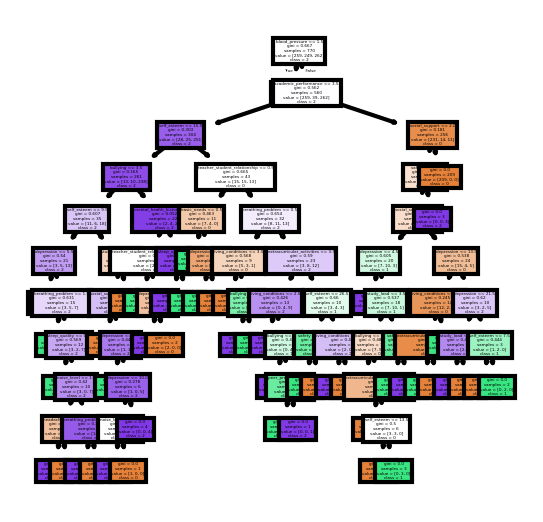

In [676]:
# Convert all feature columns to numeric types if applicable
for col in fn2:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Re-encode the target variable as strings for compatibility with plot_tree
le2 = LabelEncoder()
y2 = le2.fit_transform(df['stress_level'])
class_names2 = [str(class_label) for class_label in le2.classes_]

# Split dataset into features and target variable
X2 = df[fn2] # Features
y2 = le2.fit_transform(df['stress_level'])  # Target encoded as numbers for fitting

# Split data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1)

# Train Decision Tree Classifier
clf2 = DecisionTreeClassifier()
clf2.fit(X_train2, y_train2)

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(2, 2), dpi=300)

# Plot the decision tree
tree.plot_tree(
    clf2,
    feature_names=fn2,       # Ensure feature names are strings
    class_names=class_names2,  # Use encoded class names as strings
    filled=True
)

# Display the plot
plt.show()

3. ### Large (80% train, 20% test)

In [677]:
# Feature Selection
fn3 = df.keys().tolist()[1:-1]
X3 = df[fn3]
y3 = df['stress_level']

# Encode target variable to numerical values
le3 = LabelEncoder()
y_encoded3 = le3.fit_transform(y)

# Splitting Data into 80% training and 20% testing subsets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y_encoded3, test_size=0.2, random_state=1)

# Bulding decision tree model
clf3 = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf3 = clf3.fit(X_train3, y_train3)

# Predict the response for test dataset
y_pred3 = clf3.predict(X_test3)

# Evaluating the model
print("Accuracy:", metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.8590909090909091


- #### Confusion matrix

[[62  3  9]
 [ 5 64  2]
 [ 4  8 63]]


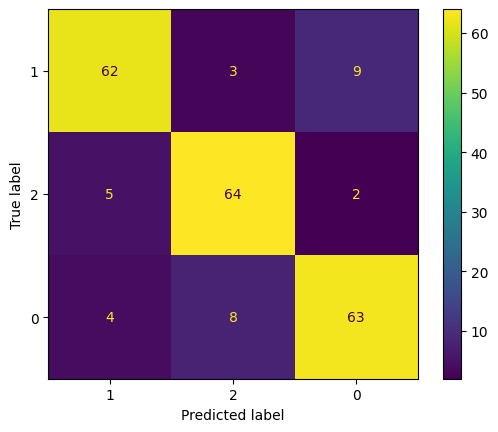

In [ ]:
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test3, y_pred3)
ssgjgjhhhkhkhuhhrint(cm3)

from sklearn.metrics import ConfusionMatrixDisplay 
cn3 = df['stress_level'].unique() # classes_names

class_labels3 = {0:'0', 1:'1', 2:'2'}

# create a confusion matrix display object 
disp = ConfusionMatrixDisplay.from_estimator(clf3, X_test3, y_test3, display_labels=cn3)

- #### Decision Tree:

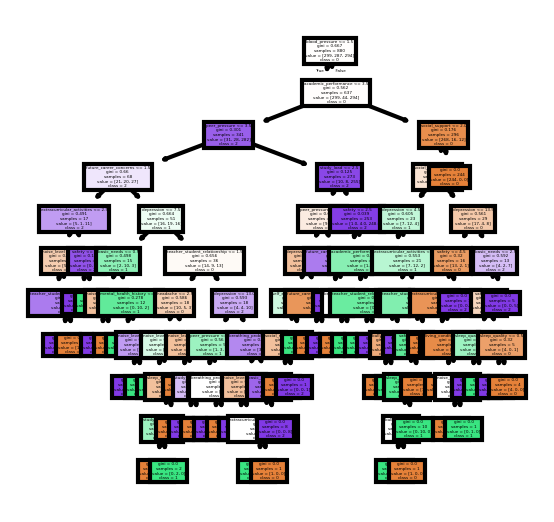

In [679]:
# Convert all feature columns to numeric types if applicable
for col in fn3:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Re-encode the target variable as strings for compatibility with plot_tree
le3 = LabelEncoder()
y3 = le3.fit_transform(df['stress_level'])
class_names3 = [str(class_label) for class_label in le3.classes_]

# Split dataset into features and target variable
X3 = df[fn3] # Features
y3 = le3.fit_transform(df['stress_level'])  # Target encoded as numbers for fitting

# Split data into training and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=1)

# Train Decision Tree Classifier
clf3 = DecisionTreeClassifier()
clf3.fit(X_train3, y_train3)

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(2, 2), dpi=300)

# Plot the decision tree
tree.plot_tree(
    clf3,
    feature_names=fn3,       # Ensure feature names are strings
    class_names=class_names3,  # Use encoded class names as strings
    filled=True
)

# Display the plot
plt.show()